In [1]:
import numpy as np
import math
from sortedcontainers import SortedDict
import random
from scipy.stats import truncnorm
import csv
import sys
import copy
import imp
from scipy.stats import norm
import scipy.special as ss

import matplotlib.pyplot as plt
from celluloid import Camera #need to install it (pip install celluloid)

In [2]:
#inputs
num_gens = 150
change_pos = 1
change_strat = 0
sd_adjust = 1

strat_interval = .25 #.05 for additive, .25 for logit
pos_interval = 50

males = 10
dist_val = 1000
dist = dist_val # distance between males

male_pos=[0,50,100,150, 200, 250, 300, 350, 400, 450]
# male_pos=[0,100,200, 300, 400, 500, 600, 700, 800, 900]
male_strat=[.15,.15,.15,.15,.15,.15,.15,.15,.15,.15]


if len(male_pos)!=males | len(male_strat)!=males:
    print("ERROR -- # of males doesn't match pos/strat input")


 # FEMALES
F_per_M = 9 #The number of sexualy mature females per sexually mature male
females = males * F_per_M # number of female birds

In [3]:
def adjust_pos(pos, dist, pos_interval, sd_below):
    rnd = np.random.uniform(-pos_interval,pos_interval)
    rnd_sd = sd_below*rnd
    new_pos = (rnd_sd + pos)%dist 
    return new_pos


def adjust_strat(strat, strat_interval, sd_below):
    rnd = np.random.uniform(-strat_interval, strat_interval)
    rnd_sd = sd_below*rnd
    new_strat = rnd_sd + strat
    if new_strat < 0:
        new_strat=0
    if new_strat > 1:
        new_strat = 1
    return new_strat

def logit_adjust_strat(strat, strat_interval, sd_below): #a good strat_interval for this is .25 
    rnd = np.random.uniform(-strat_interval, strat_interval)
    rnd_sd = sd_below*rnd
    new_strat = ss.expit(ss.logit(strat)+rnd_sd)
    return new_strat

In [4]:
def null_evolve(males, females, dist,male_pos, male_strat, num_gens, change_pos, change_strat, pos_interval, strat_interval, sd_adjust):
    fig = plt.figure()
    camera = Camera(fig)
    plt.axes(projection='polar')
    for i in range(num_gens):
        female_choices = random.choices(range(males), k=females)
        matings = [female_choices.count(x) for x in range(males)]
        rads = np.array([male_p/dist for male_p in male_pos]) * 2 * np.pi
        for id in range(males):
            radian = rads[id]
            plt.polar(radian, 1,'o', color=  plt.cm.tab10(id)) 
            if np.cos(radian)>0:
                al="left"
            else:
                al="right"
            stratstr = ""
            if change_strat==1:
                stratstr=": " + str(round(male_strat[id],2))
            lab=str(id) + stratstr
            plt.text(radian, 1.1, lab, horizontalalignment=al)
        plt.text(np.pi/2, 1.2, "".join(["Gen=", str(i)]), horizontalalignment="center") 
        camera.snap()
        underperformer_ids = np.squeeze(np.argwhere(np.asarray(matings)<9))
        sd=np.std(matings)
        sd_below=1
        for up_id in underperformer_ids:
            if sd_adjust==1:
                sd_below=(9-matings[up_id])/sd
            if change_pos == 1:
                male_pos[up_id]=adjust_pos(male_pos[up_id], dist, pos_interval, sd_below)
            if change_strat == 1:
                #male_strat[up_id]=adjust_strat(birds[up_id]["probability_maraud"], strat_interval, sd_below)
                male_strat[up_id]=logit_adjust_strat(male_strat[up_id], strat_interval, sd_below)
    lines, labels = plt.rgrids( () )
    lines, labels = plt.thetagrids( () )
    animation = camera.animate(interval=500) #a good rate, seems independent of # of gens
    plt.rcParams["animation.convert_path"] = "C:\ProgramFiles\ImageMagick\magick.exe"
    #animation.save('test_null_evolve.gif', writer="imagemagick", extra_args="convert")
                
                
#null_evolve(males, females, dist,male_pos, male_strat, num_gens, change_pos, change_strat, pos_interval, strat_interval, sd_adjust)
#well they look similar :(

7.313484999999993

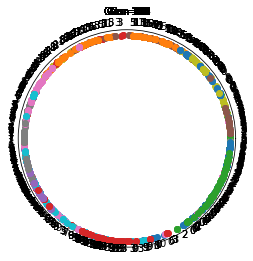

In [8]:
import timeit

def wrapper(func, *args, **kwargs):
    def wrapped():
        return func(*args, **kwargs)
    return wrapped

wrapped = wrapper(null_evolve, males, females, dist,male_pos, male_strat, num_gens, change_pos, change_strat, pos_interval, strat_interval, sd_adjust)
timeit.timeit(wrapped, number=1)

In [6]:
#NOTES

#timed runs with relevant parameters

# #inputs
# num_gens = 150
# change_pos = 1
# change_strat = 0
# sd_adjust = 1

# strat_interval = .25 #.05 for additive, .25 for logit
# pos_interval = 50

# males = 10
# dist_val = 1000
# dist = dist_val # distance between males

# male_pos=[0,50,100,150, 200, 250, 300, 350, 400, 450]
# # male_pos=[0,100,200, 300, 400, 500, 600, 700, 800, 900]
# male_strat=[.15,.15,.15,.15,.15,.15,.15,.15,.15,.15]

# time: ~10secs
#wait actually 7.4ish